## Data Wrangling: Clean, Transform, Merge, Reshape

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas
import pandas as pd

In [2]:
%matplotlib inline

## Combining and merging data sets

### Database-style DataFrame merges

In [3]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df2 = DataFrame({'key': ['a', 'b', 'd'],
                 'data2': range(3)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [4]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [5]:
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [6]:
pd.merge(df1, df2, on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [7]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'],
                 'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [8]:
pd.merge(df1, df2, how='outer')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0
6,3,c,NaN
7,NaN,d,2


In [9]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                 'data1': range(6)})
df2 = DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                 'data2': range(5)})

In [10]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [11]:
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [12]:
pd.merge(df1, df2, on='key', how='left')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,2,a,0
5,2,a,2
6,3,c,NaN
7,4,a,0
8,4,a,2
9,5,b,1


In [13]:
pd.merge(df1, df2, how='inner')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


In [14]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
                  'key2': ['one', 'two', 'one'],
                  'lval': [1, 2, 3]})
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1,4
1,foo,one,1,5
2,foo,two,2,NaN
3,bar,one,3,6
4,bar,two,NaN,7


In [15]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [16]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Merging on index

In [17]:
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                  'value': range(6)})
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [18]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [19]:
right1

,group_val
a,3.5
b,7.0


In [20]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [21]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [22]:
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                   'key2': [2000, 2001, 2002, 2001, 2002],
                   'data': np.arange(5.)})
righth = DataFrame(np.arange(12).reshape((6, 2)),
                   index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                          [2001, 2000, 2000, 2000, 2001, 2002]],
                   columns=['event1', 'event2'])
lefth

,data,key1,key2
0,0,Ohio,2000
1,1,Ohio,2001
2,2,Ohio,2002
3,3,Nevada,2001
4,4,Nevada,2002


In [23]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [24]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,data,key1,key2,event1,event2
0,0,Ohio,2000,4,5
0,0,Ohio,2000,6,7
1,1,Ohio,2001,8,9
2,2,Ohio,2002,10,11
3,3,Nevada,2001,0,1


In [25]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

,data,key1,key2,event1,event2
0,0,Ohio,2000,4,5
0,0,Ohio,2000,6,7
1,1,Ohio,2001,8,9
2,2,Ohio,2002,10,11
3,3,Nevada,2001,0,1
4,4,Nevada,2002,NaN,NaN
4,NaN,Nevada,2000,2,3


In [26]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],
                 columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])

In [27]:
left2

,Ohio,Nevada
a,1,2
c,3,4
e,5,6


In [28]:
right2

,Missouri,Alabama
b,7,8
c,9,10
d,11,12
e,13,14


In [29]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1,2,NaN,NaN
b,NaN,NaN,7,8
c,3,4,9,10
d,NaN,NaN,11,12
e,5,6,13,14


In [30]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1,2,NaN,NaN
b,NaN,NaN,7,8
c,3,4,9,10
d,NaN,NaN,11,12
e,5,6,13,14


In [31]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [32]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])

In [33]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1,2,NaN,NaN,7,8
c,3,4,9,10,9,10
e,5,6,13,14,11,12


In [34]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1,2,NaN,NaN,7,8
b,NaN,NaN,7,8,NaN,NaN
c,3,4,9,10,9,10
d,NaN,NaN,11,12,NaN,NaN
e,5,6,13,14,11,12
f,NaN,NaN,NaN,NaN,16,17


### Concatenating along an axis

In [35]:
arr = np.arange(12).reshape((3, 4))

In [36]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [37]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [38]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])

In [39]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [43]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0,NaN,NaN
b,1,NaN,NaN
c,NaN,2,NaN
d,NaN,3,NaN
e,NaN,4,NaN
f,NaN,NaN,5
g,NaN,NaN,6


In [44]:
s4 = pd.concat([s1 * 5, s3])

In [45]:
pd.concat([s1, s4], axis=1)

,0,1
a,0,0
b,1,5
f,NaN,5
g,NaN,6


In [51]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0,NaN,NaN
b,1,NaN,NaN
c,NaN,2,NaN
d,NaN,3,NaN
e,NaN,4,NaN
f,NaN,NaN,5
g,NaN,NaN,6


In [55]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [56]:
df1

,a,b,c,d
0,0.703197,1.559067,0.725085,-1.514392
1,1.627773,1.282836,0.226803,0.421831
2,1.154829,0.726857,-1.263340,0.938788


In [57]:
df2

,b,d,a
0,-1.318128,-1.234575,-1.162871
1,-0.835070,0.981172,1.519172


In [58]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,0.703197,1.559067,0.725085,-1.514392
1,1.627773,1.282836,0.226803,0.421831
2,1.154829,0.726857,-1.263340,0.938788
3,-1.162871,-1.318128,NaN,-1.234575
4,1.519172,-0.835070,NaN,0.981172


## Data transformation

### Removing duplicates

In [ ]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

In [ ]:
data.duplicated()

In [ ]:
data.drop_duplicates()

In [ ]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

In [ ]:
data.drop_duplicates(['k1', 'k2'], take_last=True)

### Transforming data using a function or mapping

In [ ]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

In [ ]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [ ]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

In [ ]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

### Replacing values

In [ ]:
data = Series([1., -999., 2., -999., -1000., 3.])
data

In [ ]:
data.replace(-999, np.nan)

In [ ]:
data.replace([-999, -1000], np.nan)

In [ ]:
data.replace([-999, -1000], [np.nan, 0])

In [ ]:
data.replace({-999: np.nan, -1000: 0})

### Renaming axis indexes

In [ ]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

In [ ]:
data.index.map(str.upper)

In [ ]:
data.index = data.index.map(str.upper)
data

In [ ]:
data.rename(index=str.title, columns=str.upper)

In [ ]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

In [ ]:
# Always returns a reference to a DataFrame
_ = data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

### Discretization and binning

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [ ]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

In [ ]:
cats.labels

In [ ]:
cats.levels

In [ ]:
pd.value_counts(cats)

In [ ]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

In [ ]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

In [ ]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

In [ ]:
data = np.random.randn(1000) # Normally distributed
cats = pd.qcut(data, 4) # Cut into quartiles
cats

In [ ]:
pd.value_counts(cats)

In [ ]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

### Detecting and filtering outliers

In [82]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


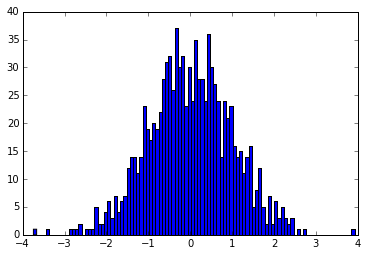

In [83]:
plt.hist(data[3], bins=100)
plt.show()

In [84]:
col = data[3]
col[np.abs(col) > 3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [70]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [71]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


## String manipulation

### String object methods

In [ ]:
val = 'a,b,  guido'
val.split(',')

In [ ]:
pieces = [x.strip() for x in val.split(',')]
pieces

In [ ]:
first, second, third = pieces
first + '::' + second + '::' + third

In [ ]:
'::'.join(pieces)

In [ ]:
'guido' in val

In [ ]:
val.index(',')

In [ ]:
val.find(':')

In [ ]:
val.index(':')

In [ ]:
val.count(',')

In [ ]:
val.replace(',', '::')

In [ ]:
val.replace(',', '')

### Vectorized string functions in pandas

In [ ]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = Series(data)

In [ ]:
data

In [ ]:
data.isnull()

In [ ]:
data.str.contains('gmail')

In [ ]:
pattern

In [ ]:
data.str.findall(pattern, flags=re.IGNORECASE)

In [ ]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

In [ ]:
matches.str.get(1)

In [ ]:
matches.str[0]